In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
# Edit file make_grid_param.py to change some default value
import make_grid_param as param

import matplotlib.pyplot as plt

In [3]:
# Create inputs and outputs class
from Modules.tools_make_grid import inputs, inputs_smth

inputs = inputs(param.tra_lon, param.tra_lat, param.size_x, param.size_y, param.nx, param.ny, param.rot)
inputs_smth = inputs_smth(param.hmin, param.hmax, param.smth_rad, param.rfact, param.smooth_meth)

In [4]:
# Create lon/lat grid
from Modules.tools_make_grid import EasyGrid
outputs = EasyGrid.easygrid(None, inputs)

In [5]:
# --- Build mask and topo -----------------------------------------
from Modules.tools_make_grid import GetTopo
GetTopo.topo(None, outputs, param.topofile, param.shp_file, smooth=inputs_smth, sgl_connect=param.sgl_connect)

Reading topography file: ./data/input/etopo2.nc
Single region dataset imin/imax= 5499 6201
Bounding indices of the relevant part to be extracted from the entire dataset:
 imin,imax = 5499 6201 out of 10800 jmin,jmax = 1506 1986 out of 5400
Interpolating topography to ROMS grid

 Geographical extents of the dataset:
Finished interpolating
    Longitude min/max =    3.300000   26.700001
    Latitude  min/max =  -39.799999  -23.799999

 Geographical extents of requested ROMS grid:
    Longitude min/max =    3.360625   26.639375
    Latitude  min/max =  -39.749981  -23.853737

 Bounding indices for the portion of dataset covering the entire model grid:
 iwest,ieast =    2   701 out of   703 jsouth,jnorth =    2   479 out of   481

 Averaging window width = 4.00000 in grid spaces.

..........

 Wall Clock time spent to compute hraw    0.63 sec running   1 threads.
Building mask from  ./data/input/gshhs/GSHHS_shp/f/GSHHS_f_L1.shp
 enter smooth_thread r_max = 0.2000000  iters_cond =  500  ite

_max = 0.3450789    37   23 ry_max = 0.3014217
   14    14   44 rx_max = 0.3386446    37   23 ry_max = 0.2961527
   15    14   44 rx_max = 0.3327349    37   23 ry_max = 0.2913003
   16    14   44 rx_max = 0.3274654    37   23 ry_max = 0.2868476
   17    14   44 rx_max = 0.3227402    37   23 ry_max = 0.2826587
   18    14   44 rx_max = 0.3184673    37   23 ry_max = 0.2787530
   19    14   44 rx_max = 0.3145717    37   23 ry_max = 0.2751420
   20    14   44 rx_max = 0.3109932    37   23 ry_max = 0.2718823
   21    14   44 rx_max = 0.3076753    37   23 ry_max = 0.2689059
   22    14   44 rx_max = 0.3045712    37   23 ry_max = 0.2661508
   23    14   44 rx_max = 0.3016406    37   23 ry_max = 0.2635714
   24    14   44 rx_max = 0.2988514    37   23 ry_max = 0.2610491
   25    14   44 rx_max = 0.2961815    37   23 ry_max = 0.2586097
   26    14   44 rx_max = 0.2936153    37   23 ry_max = 0.2562662
   27    14   44 rx_max = 0.2911416    37   23 ry_max = 0.2540240
   28    14   44 rx_max = 0.2

<GeoAxes: >

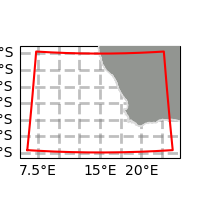

In [10]:
from Modules.map_tools.map_tools import plot_grid

plt.style.use('_mpl-gallery')
figure = plt.figure()
plot_grid(outputs, figure)

# more arguments :
# 3 arg must be one off grid points, topo, 1/pm, 1/pn, angle, mask
# 4 arg is the shape file
# plot_grid(outputs, figure, 'topo', 'path_to_shape_file')

<GeoAxes: >

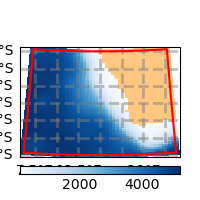

In [9]:
from Modules.map_tools.map_tools import plot_topo

plt.style.use('_mpl-gallery')
figure = plt.figure()
plot_topo(outputs, figure)

In [11]:
from Modules.croco_class import CROCO
CROCO.create_grid_nc(None, param.output_file, inputs, outputs)

Writting ./data/output/1675437339_croco_grd.nc done
